## Naive Bayes

### Part I: Explain Laplace smoothing (for example, see reference [1]).


Laplace smoothing is a technique used in **Naive Bayes classifiers**, which are a type of **generative learning algorithm**. It addresses the issue of **zero probabilities** when a specific feature value \( x_j \) is not observed in the training data for a particular class \( y \).

---

Naive Bayes computes probabilities for a class \( y \) given the input features \( x \):
P(y∣x)= P(x∣y)P(y)/P(x)
​

Here, \( P(x | y) \) is often broken down into the product of probabilities for each feature due to the Naive Bayes assumption of conditional independence:
P(x∣y)=
j=1
∏
n
​
 P(x
j
 ​
∣ y)

##### **Zero-Probability Problem**
If a particular feature value \( x_j \) has not been observed in the training data for a given class \( y \), then \( P(x_j | y) = 0 \). This makes the entire product \( P(x | y) \) zero, and as a result, the posterior probability \( P(y | x) \) becomes zero. This leads to **incorrect classifications** and poor generalization.


### Part II: Build a Naïve Bayes algorithm on the Titanic dataset to predict whether a passenger survived or not.

In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing sklearn tools for model training, evaluation, and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

import warnings
# Settings the warnings to be ignored
warnings.filterwarnings('ignore')


In [ ]:
# Load dataset into a Pandas DataFrame
train_data = pd.read_csv("train.csv")
test_file = pd.read_csv("test.csv")
y_pred_data = pd.read_csv("gender_submission.csv")

In [ ]:
test_data = pd.merge(test_file, y_pred_data,
                   on='PassengerId',
                   how='inner')

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Survived     418 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


PassengerId, Name, Ticket number is not needed to predict the Survived column. So dropping it in both train and test set

In [ ]:
# Dropping columns that are irrelevant for prediction: 'PassengerId', 'Name', and 'Ticket'
train_data = train_data.drop(columns=['PassengerId', 'Name','Ticket'])

In [ ]:
test_data = test_data.drop(columns=['PassengerId','Name','Ticket'])

In [ ]:
train_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
# Handling missing values in the 'Age' column of the training dataset by replacing with the mean
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())

In [ ]:
# Verifying that no missing values remain in the training dataset
train_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
test_data.isnull().sum()

Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
Survived      0
dtype: int64

In [ ]:
# Handling missing values in the test dataset for 'Age' and 'Fare' columns
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].mean())
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].mean())

In [ ]:
# Displaying value counts of the target column 'Survived' to understand the distribution
train_data["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [ ]:
# Encoding categorical variables into numeric form
from sklearn.preprocessing import LabelEncoder

train_columns_to_encode = train_data.select_dtypes(include=['object']).columns.to_list()
train_columns_to_encode

['Sex', 'Cabin', 'Embarked']

In [ ]:
le = LabelEncoder()

# Apply label encoding using a loop
for column in train_columns_to_encode:
    train_data[column] = le.fit_transform(train_data[column])

train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,147,2
1,1,1,0,38.0,1,0,71.2833,81,0
2,1,3,0,26.0,0,0,7.9250,147,2
3,1,1,0,35.0,1,0,53.1000,55,2
4,0,3,1,35.0,0,0,8.0500,147,2


In [ ]:
test_columns_to_encode = test_data.select_dtypes(include=['object']).columns.to_list()
test_columns_to_encode

['Sex', 'Cabin', 'Embarked']

In [ ]:
le = LabelEncoder()

# Apply label encoding using a loop
for column in test_columns_to_encode:
    test_data[column] = le.fit_transform(test_data[column])

test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
0,3,1,34.5,0,0,7.8292,76,1,0
1,3,0,47.0,1,0,7.0000,76,2,1
2,2,1,62.0,0,0,9.6875,76,1,0
3,3,1,27.0,0,0,8.6625,76,2,0
4,3,0,22.0,1,1,12.2875,76,2,1


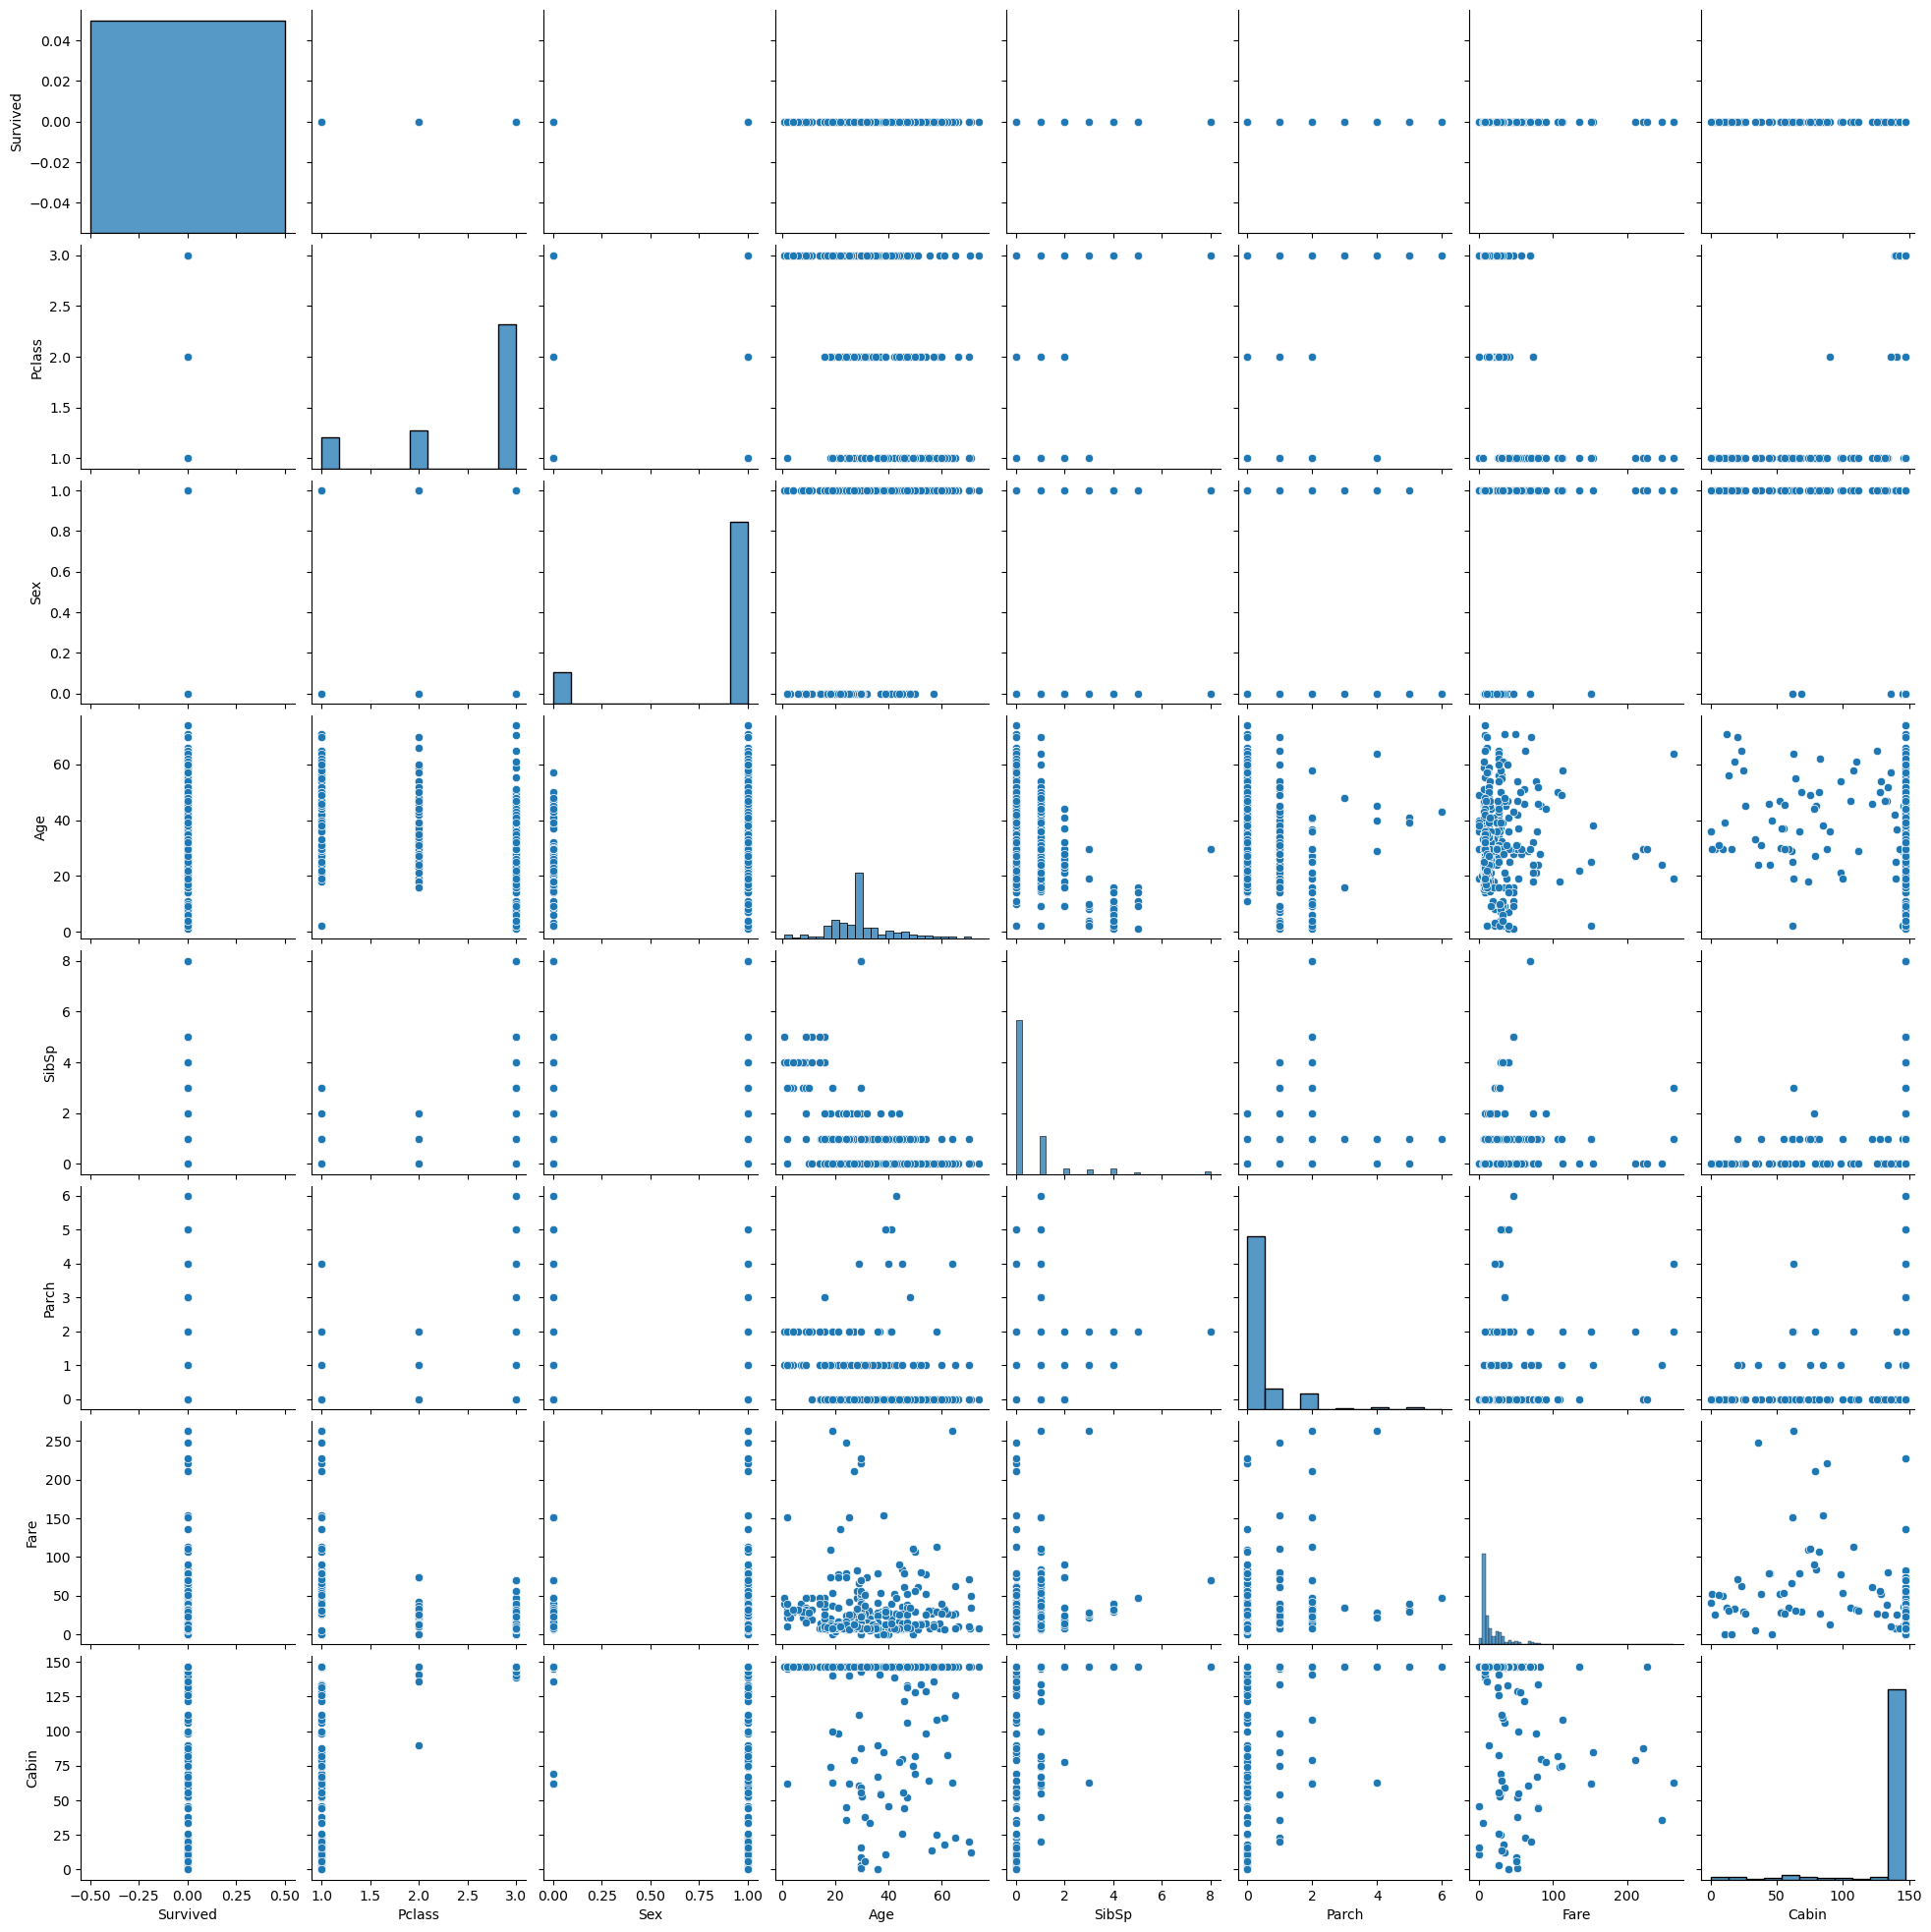

In [ ]:
# Pair plots to visualize feature distributions for each survival group
sns.pairplot(train_data[train_data.Survived==0].iloc[:,:-1]);

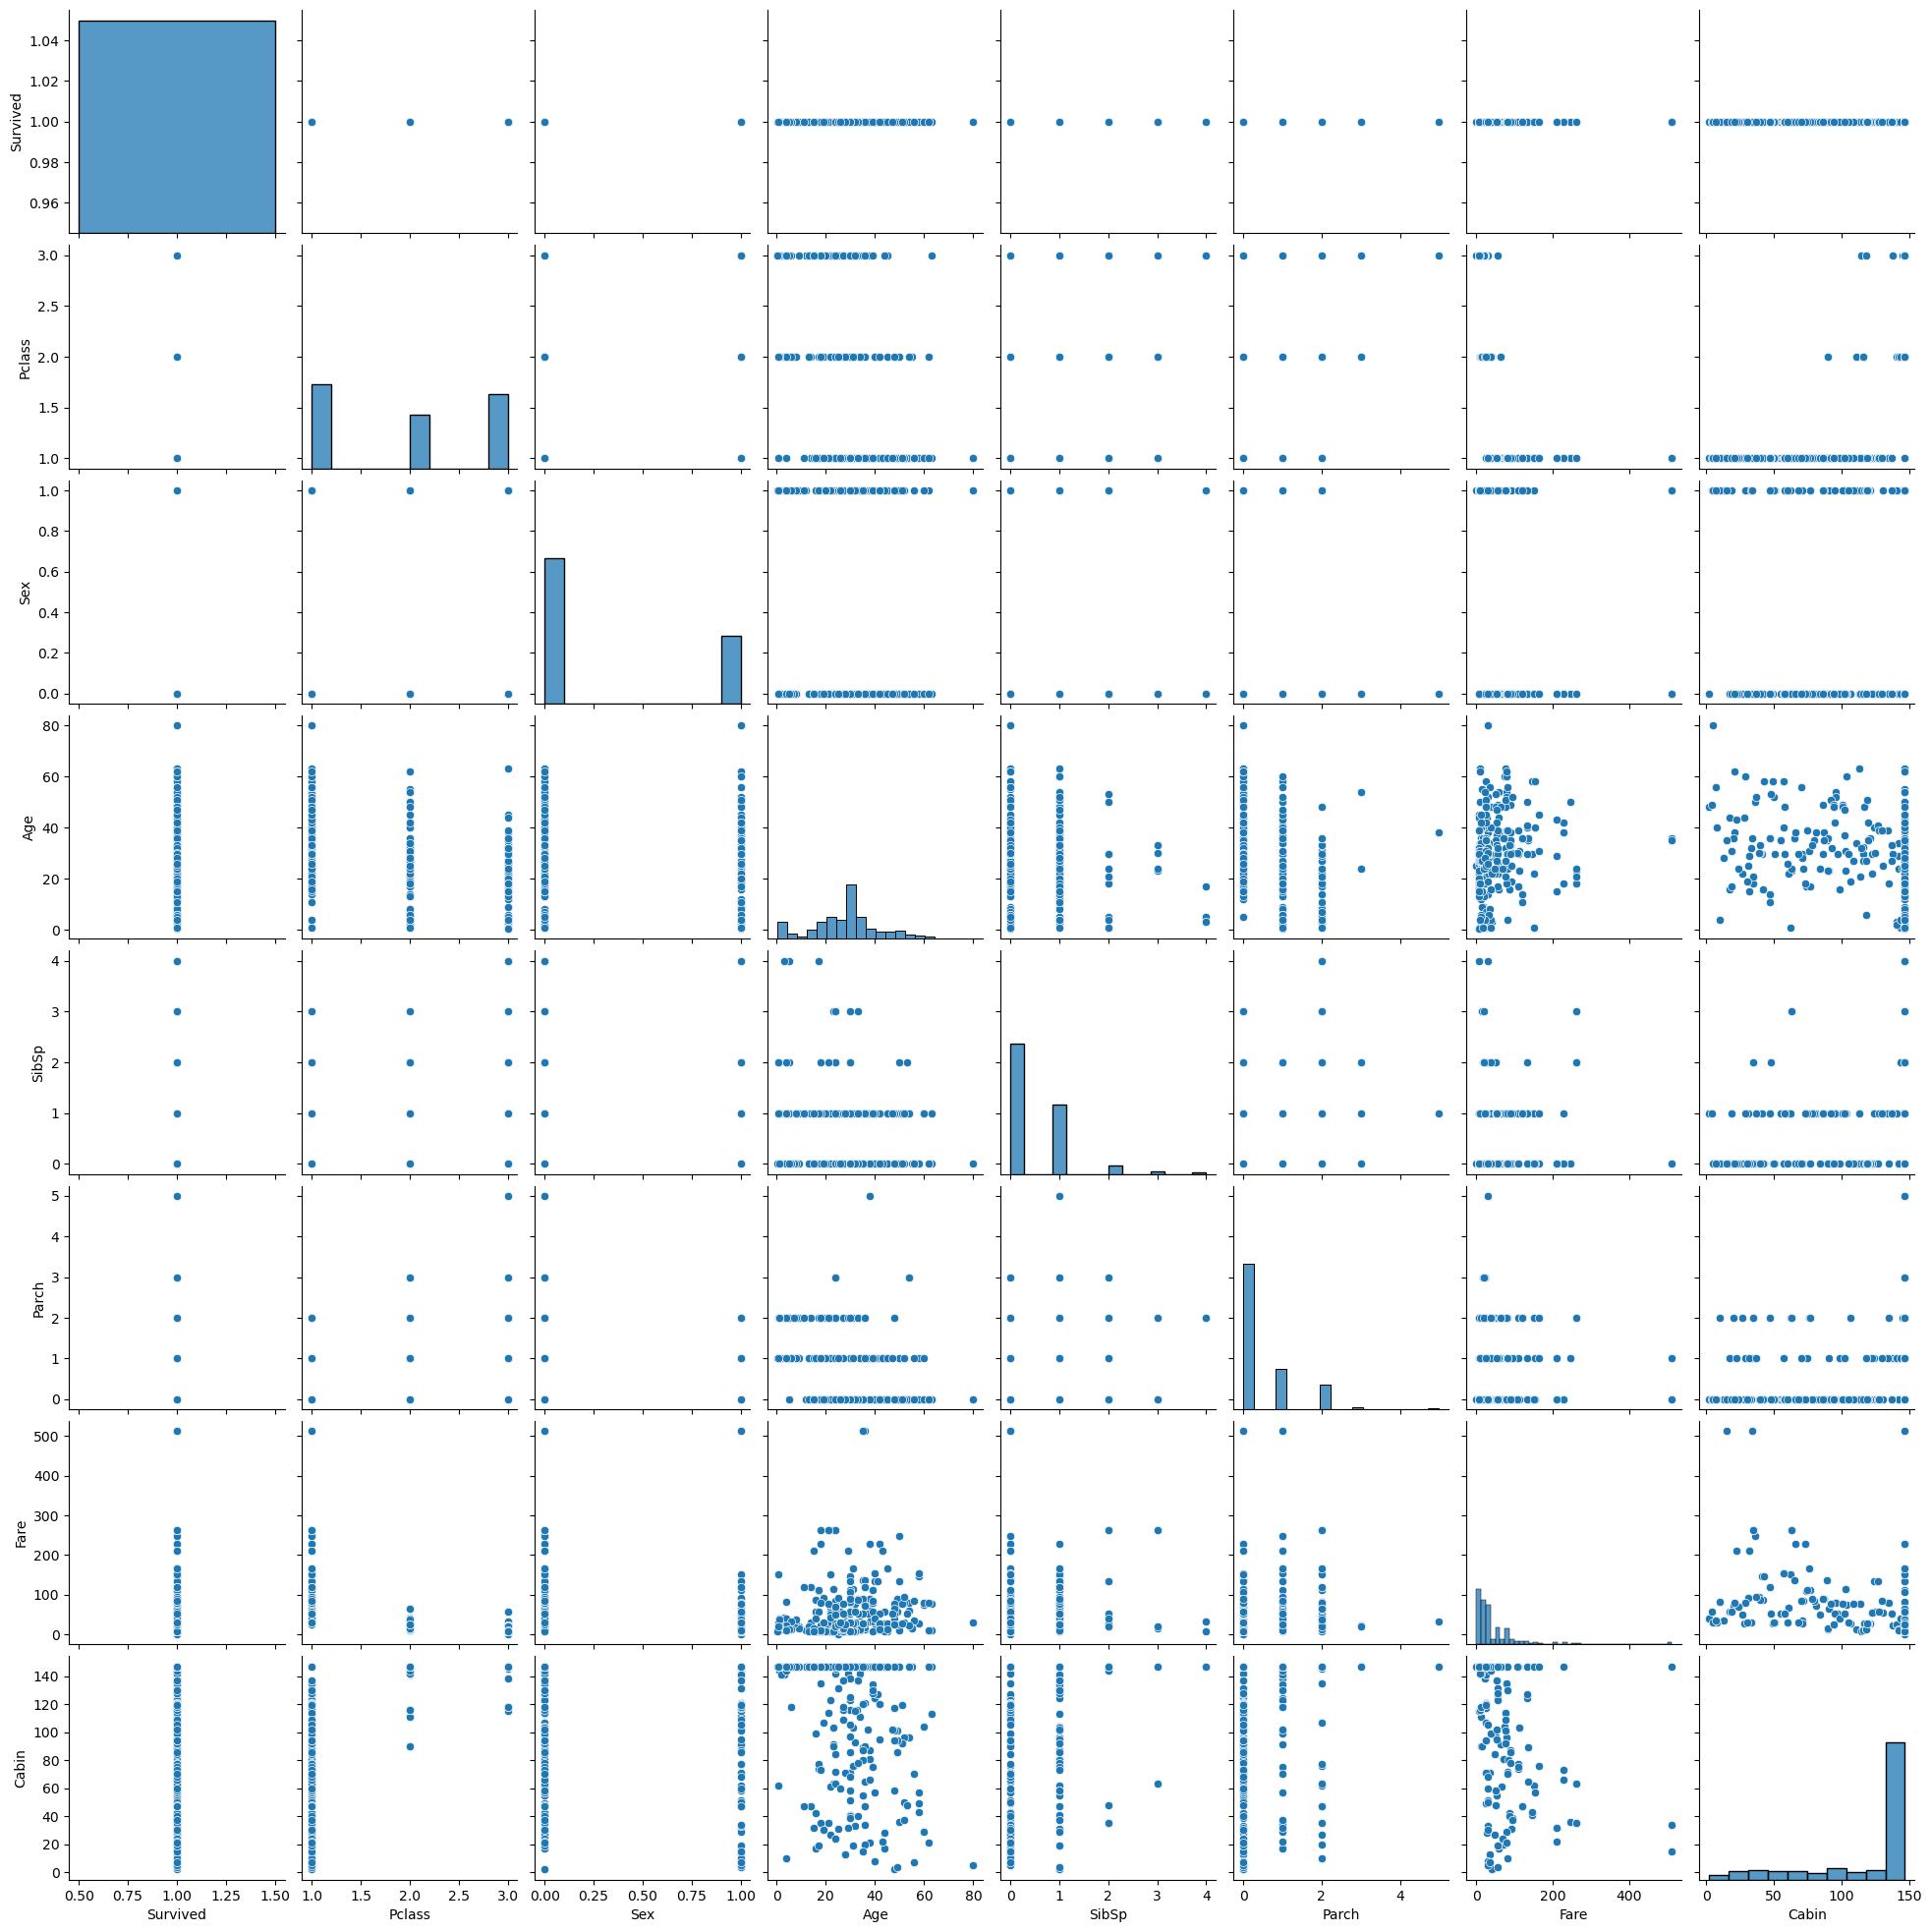

In [ ]:
sns.pairplot(train_data[train_data.Survived==1].iloc[:,:-1]);

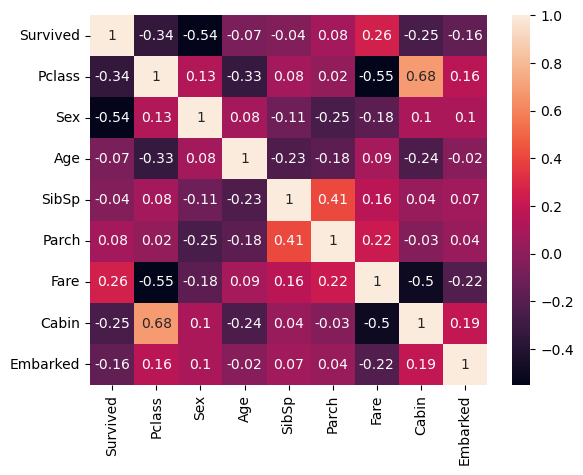

In [ ]:
# Correlation heatmap to analyze relationships between numerical features
corr_matrix = train_data.corr().round(2)
sns.heatmap(data=corr_matrix, annot=True)
plt.show()

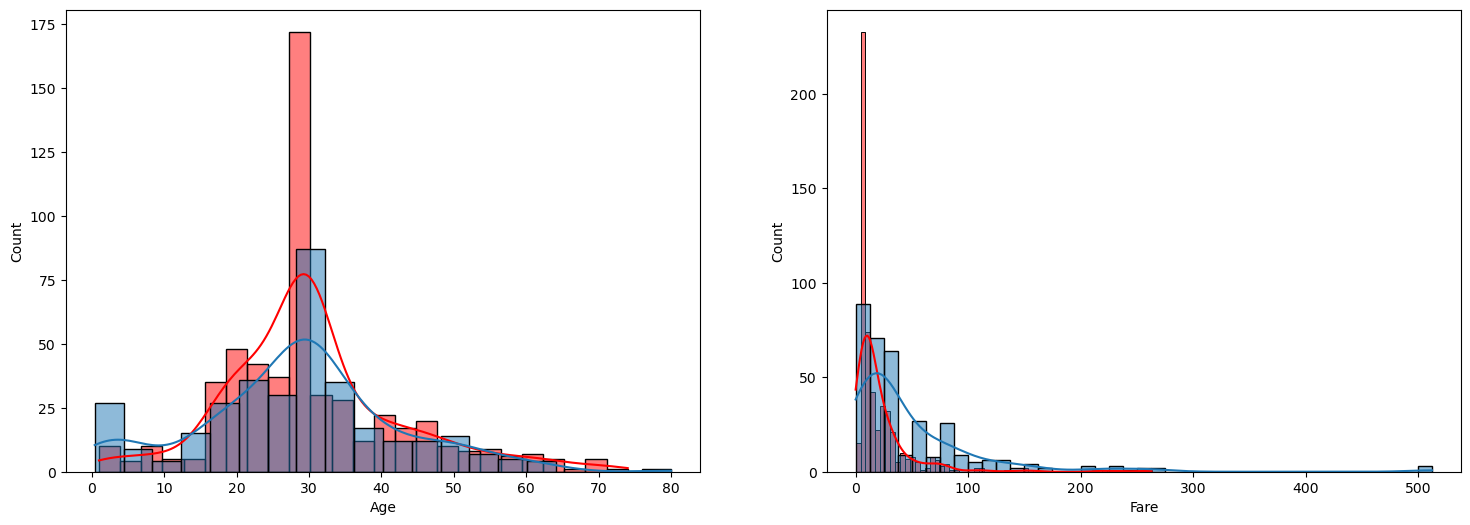

In [ ]:
# Visualizing age and fare distributions for survived and non-survived passengers
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.histplot(train_data[train_data.Survived==0], ax=axes[0], x="Age", kde=True, color="r")
sns.histplot(train_data[train_data.Survived==1], ax=axes[0], x="Age", kde=True)

sns.histplot(train_data[train_data.Survived==0], ax=axes[1], x="Fare", kde=True, color="r")
sns.histplot(train_data[train_data.Survived==1], ax=axes[1], x="Fare", kde=True);

In [ ]:
# Splitting features and target variable for training and testing datasets
X_train = train_data.drop(columns=["Survived"])
y_train = train_data["Survived"]

In [ ]:
X_test = test_data.drop(columns=["Survived"])
y_test = test_data["Survived"]

In [ ]:
# Scaling features using MinMaxScaler for improved model performance
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
# Model training and evaluation using Multinomial Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[181  85]
 [ 73  79]]
              precision    recall  f1-score   support

           0       0.71      0.68      0.70       266
           1       0.48      0.52      0.50       152

    accuracy                           0.62       418
   macro avg       0.60      0.60      0.60       418
weighted avg       0.63      0.62      0.62       418



In [ ]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[194  72]
 [  4 148]]
              precision    recall  f1-score   support

           0       0.98      0.73      0.84       266
           1       0.67      0.97      0.80       152

    accuracy                           0.82       418
   macro avg       0.83      0.85      0.82       418
weighted avg       0.87      0.82      0.82       418



In [ ]:
# Model training and evaluation using Bernoulli Naive Bayes
model = BernoulliNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[258   8]
 [  0 152]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       266
           1       0.95      1.00      0.97       152

    accuracy                           0.98       418
   macro avg       0.97      0.98      0.98       418
weighted avg       0.98      0.98      0.98       418



In [ ]:
# Making predictions for new passenger data
data = pd.DataFrame({
    'Pclass': [1,3,2],
    'Sex': [1, 0, 0],
    'Age': [23.0, 9.0, 40.0],
    'SibSp': [1, 0, 1],
    'Parch': [0, 1, 2],
    'Fare': [25.0, 97.0, 51.0],
    'Cabin': [12, 25, 35],
    'Embarked': [0, 2, 1]
})
X_new = data.values
predicted_value = model.predict(X_new)
print("Predicted values:", predicted_value)

Predicted values: [0 1 1]
